In [1]:
import numpy as np




In [2]:
import pandas as pd


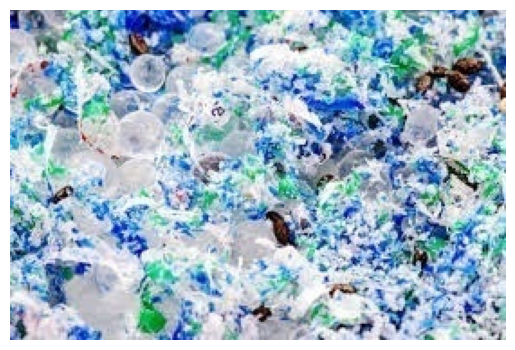

True

In [3]:
import cv2
from matplotlib import pyplot as plt



image = cv2.imread('image3.jpg')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


if image is not None:
    
    plt.imshow(image_rgb)
    plt.axis('off')  
    plt.show()
else:
    print("Error: Unable to load the image.")

cv2.imwrite('image3.jpg', image)


In [4]:
import os
import cv2
import numpy as np


def load_images_from_folders(folders):
    images = []
    labels = []
    for class_id, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            if img_path.endswith(".jpg") or img_path.endswith(".png"):
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  
                if img is not None:
                    img = cv2.resize(img, (100, 100))  
                    images.append(img)
                    labels.append(class_id)  
    return images, labels


train_folders = ["/workspaces/TRY/DATASET/DATASET/TEST/O", "/workspaces/TRY/DATASET/DATASET/TEST/R"]
train_images, train_labels = load_images_from_folders(train_folders)


X_train = np.array(train_images)
y_train = np.array(train_labels)


X_train = X_train.astype('float32') / 255.0

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (2513, 100, 100, 3)
y_train shape: (2513,)


In [5]:
import cv2
import os
import numpy as np


def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
            if img is not None:
                img = cv2.resize(img, (100, 100)) 
                images.append(img)
                labels.append(1 if "cat" in filename else 0)  
    return images, labels


train_folder = "/workspaces/TRY/DATASET/TRAIN"
train_images, train_labels = load_images_from_folder(train_folder)

test_folder = "/workspaces/TRY/DATASET/TEST"
test_images, test_labels = load_images_from_folder(test_folder)


X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (0, 1)
y_train shape: (0,)
X_test shape: (0, 1)
y_test shape: (0,)


In [6]:
import cv2
import os
import numpy as np


def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  
            if img is not None:
                img = cv2.resize(img, (100, 100))  
                images.append(img)
                labels.append(1 if "R" in filename else 0)  
    return images, labels

train_folder = "/workspaces/TRY/DATASET/DATASET/TRAIN"
train_images, train_labels = load_images_from_folder(train_folder)


test_folder = "/workspaces/TRY/DATASET/DATASET/TEST"
test_images, test_labels = load_images_from_folder(test_folder)


X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (0, 1)
y_train shape: (0,)
X_test shape: (0, 1)
y_test shape: (0,)


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

def load_images_from_folders(folders):
    images = []
    labels = []
    for class_id, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            if img_path.endswith(".jpg") or img_path.endswith(".png"):
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, (100, 100)) 
                    images.append(img)
                    labels.append(class_id) 
    return images, labels


train_folders = ["/workspaces/TRY/DATASET/DATASET/TEST/O", "/workspaces/TRY/DATASET/DATASET/TEST/R"]
train_images, train_labels = load_images_from_folders(train_folders)

X_train = np.array(train_images)
y_train = np.array(train_labels)


X_train = X_train.astype('float32') / 255.0

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

model.save("model.h5")


2024-07-14 04:47:29.267206: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 04:47:29.274981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 04:47:29.304922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 04:47:29.351294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 04:47:29.366641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-14 04:47:29.395010: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/10


2024-07-14 04:47:40.575798: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 241200000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7188 - loss: 0.7183

2024-07-14 04:48:01.474536: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 60360000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - accuracy: 0.7202 - loss: 0.7147 - val_accuracy: 0.9165 - val_loss: 0.2158
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.9075 - loss: 0.2491 - val_accuracy: 0.8748 - val_loss: 0.2886
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.9028 - loss: 0.2500 - val_accuracy: 0.9404 - val_loss: 0.1783
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.9214 - loss: 0.1946 - val_accuracy: 0.9423 - val_loss: 0.1917
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9357 - loss: 0.1733 - val_accuracy: 0.9344 - val_loss: 0.1653
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - accuracy: 0.9435 - loss: 0.1462 - val_accuracy: 0.9284 - val_loss: 0.1743
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - accuracy: 0.9477 - loss: 0.1310 - val_accuracy: 0.9165 - val_loss: 0.1887
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - accuracy: 0.9491 - loss: 0.1307 - val_accuracy: 0.928

2024-07-14 04:51:07.185241: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 60360000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9301 - loss: 0.2634


Test accuracy: 0.9284294247627258
